# Lending Club Case Study

## 1. Import Libraries

In [102]:
# Importing Libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')

## 2. Load Data

In [51]:
#reading the data
loan_df = pd.read_csv("loan.csv")

# shape to get number of rows and columns
loan_df.shape

(39717, 111)

In [52]:
# Get the information od data frame
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## 3. Validate null/empty values in all the columns

In [53]:
# Columns which contains empty values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [54]:
# remove the empty column
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [55]:
loan_df.value_counts
# this gives us detailaion of columns, data and values

<bound method DataFrame.value_counts of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87   

## 4. Remove Single valued and Not required Columns

In [56]:
# Drop Single Vlaued columns
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [57]:
# Drop un-necessary columns
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


#### Now we have the required columns

In [58]:
loan_df.shape

(39717, 22)

# 5. Handling Missing values

In [59]:
# Identify the missing values in each columns
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

In [60]:
# Columns 'emp_length' and 'revol_util' has empty values

#### remove the rows where the columns contain empty values

In [61]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0

In [62]:
loan_df.dropna(axis = 0, subset = ['emp_length'] , inplace = True)
loan_df.revol_util.isna().sum()

0

In [63]:
# Identify the missing values in each columns
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

In [64]:
# this was the shape after removing emppty cells
loan_df.shape

(38595, 22)

# 6. Convert the columns data types

In [65]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   funded_amnt          38595 non-null  int64  
 2   funded_amnt_inv      38595 non-null  float64
 3   term                 38595 non-null  object 
 4   int_rate             38595 non-null  object 
 5   installment          38595 non-null  float64
 6   grade                38595 non-null  object 
 7   sub_grade            38595 non-null  object 
 8   emp_length           38595 non-null  object 
 9   home_ownership       38595 non-null  object 
 10  annual_inc           38595 non-null  float64
 11  verification_status  38595 non-null  object 
 12  issue_d              38595 non-null  object 
 13  loan_status          38595 non-null  object 
 14  purpose              38595 non-null  object 
 15  dti                  38595 non-null 

In [66]:
# Columns 'emp_length', 'int_rate', 'revol_util' are continuous values having 'object' as data type
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : x.split('%')[0]))
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : x.split('%')[0]))


In [67]:
# Conidering '0' if emp_length <1 year and '10' as > 10 +year
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))) 

In [136]:
# Create new column year using 'issue_d' column
loan_df['Year'] = loan_df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loan_df['Month'] = loan_df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').month)

In [137]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,Year,Month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,car,1.00,Apr-99,5,3,0,9.4,4,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,small_business,8.72,Nov-01,2,2,0,98.5,10,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,other,20.00,Feb-96,1,10,0,21.0,37,2011,12
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,wedding,11.20,Nov-04,3,9,0,28.3,12,2011,12


# 7. Ignore the 'loan_status' which is 'current'

In [69]:
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()
# considering the 'Fully Paid' and 'charged off' loan status

array(['Fully Paid', 'Charged Off'], dtype=object)

# 8. UniVAriate Analysis

### BAR GRAPH FOR LOAN STATUS

Fully Paid     32113
Charged Off     5384
Name: loan_status, dtype: int64
***************************************************************************


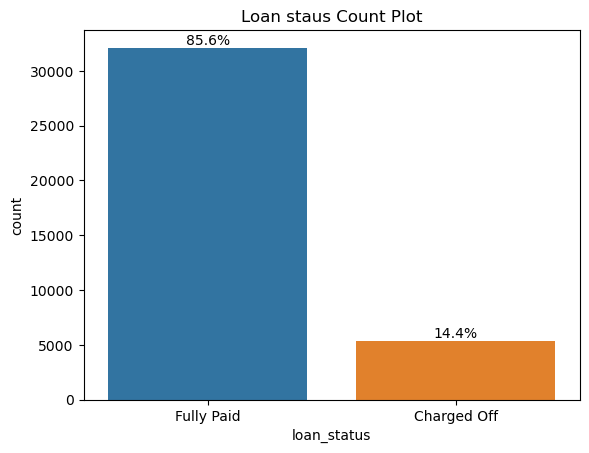

In [70]:
print(loan_df.loan_status.value_counts())
print("***************************************************************************")
ax = sns.countplot(data = loan_df,x='loan_status')
plt.title('Loan staus Count Plot')
ncount = len(loan_df)

for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
        
        
plt.show()

### BAR GRAPH FOR ANALYSIS OF EMPLOYEE LENGTH

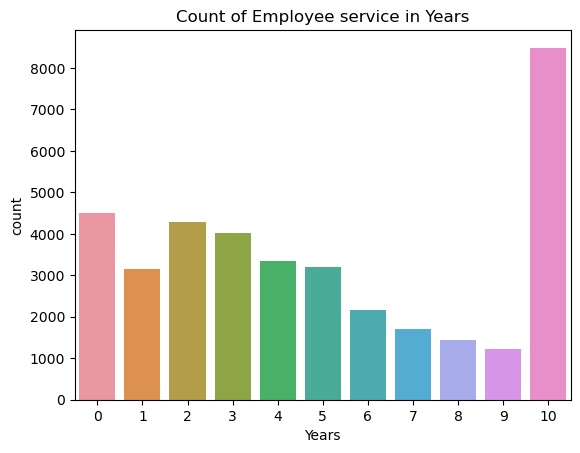

In [71]:
sns.countplot(data = loan_df,x='emp_length')
plt.title("Count of Employee service in Years")
plt.xlabel("Years")
plt.show()

### Intrest Rate Analysis

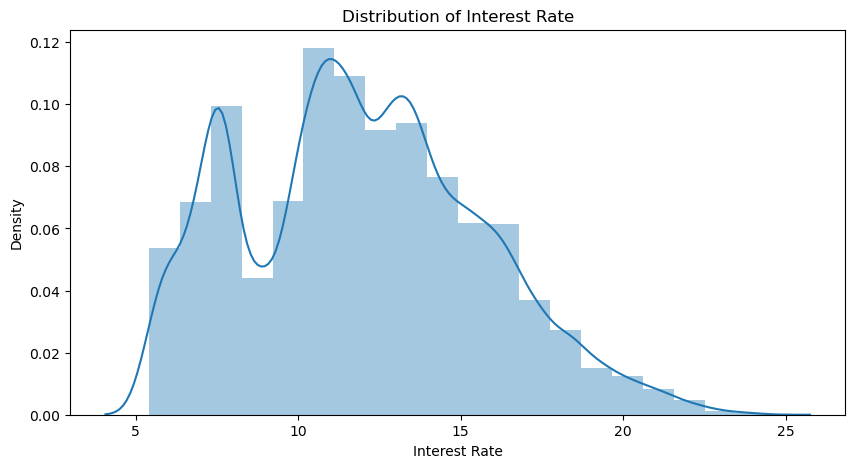

In [72]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

### House Ownership

RENT        18047
MORTGAGE    16586
OWN          2765
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
***************************************************************************


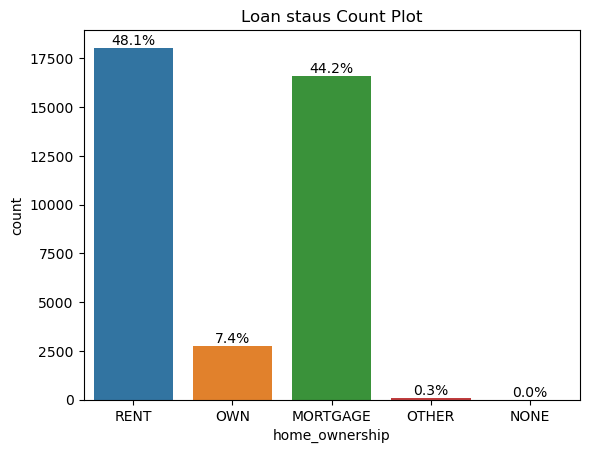

In [78]:
print(loan_df.home_ownership.value_counts())
print("***************************************************************************")
ax = sns.countplot(data = loan_df,x='home_ownership')
plt.title('Loan staus Count Plot')*******************************************************************************************************************
ncount = len(loan_df)

for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
        
        
plt.show()

### PURPOSE OF LOAN

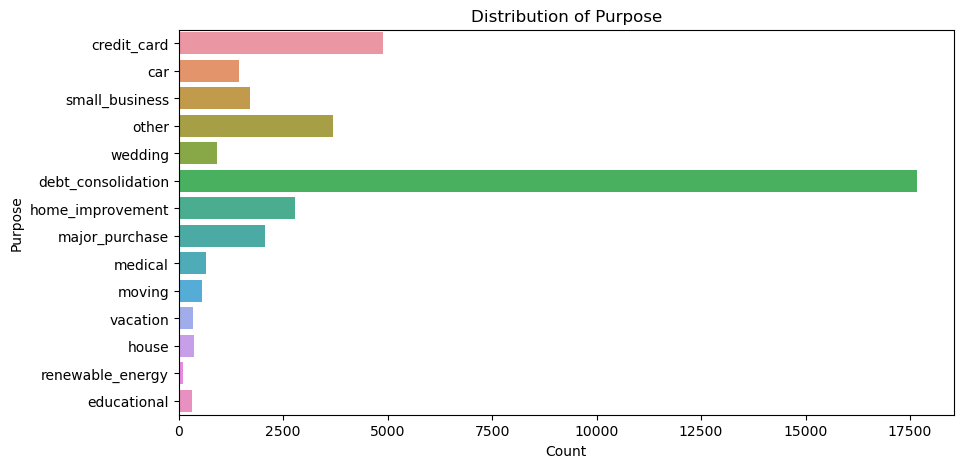

In [80]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_df.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

### NUMBER OF LOANS ISSUED IN A YEAR & LOAN PURPOSE & GRADE

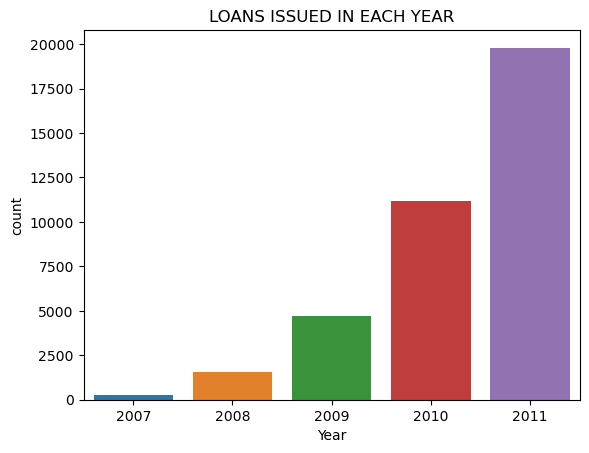

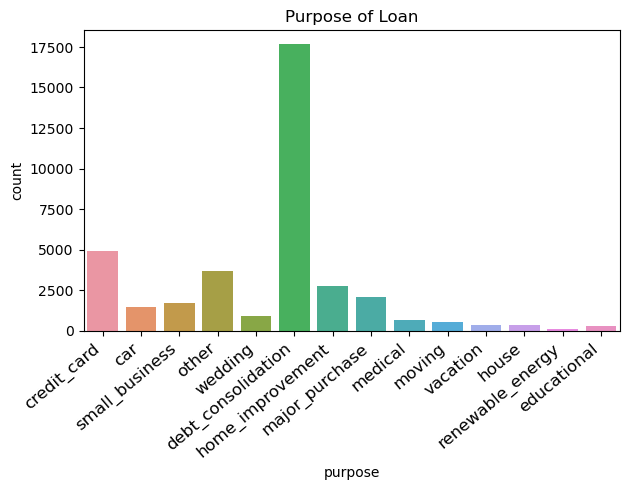

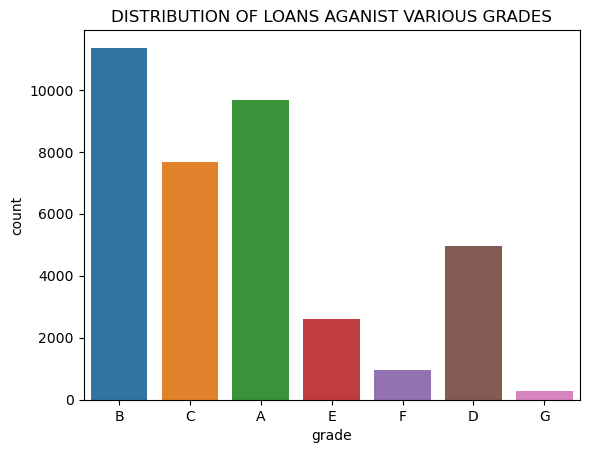

In [128]:

def plt_graphs(x_var,data_df,title,rot_flag=0):

    ax = sns.countplot(x=x_var, data=data_df)
    
    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
        
    plt.title(title)
    plt.show()

plt_graphs("Year",loan_df,'LOANS ISSUED IN EACH YEAR')
plt_graphs("purpose",loan_df,'Purpose of Loan',1)
plt_graphs("grade",loan_df,'DISTRIBUTION OF LOANS AGANIST VARIOUS GRADES')

# BIVARIATE ANALYSIS

### BOX PLOT FOR COMPARISON OF INTREST RATE BASED ON GRADE

In [153]:
# Sort the grades
loan_df = loan_df.sort_values('grade')

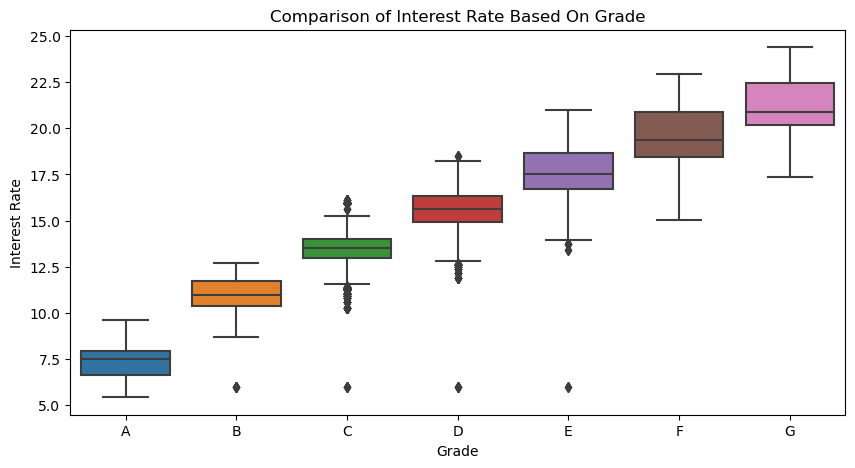

In [154]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='grade',y='int_rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

### Line graph for Comaprison of issued loan amount in month and a year

<Axes: xlabel='Month', ylabel='loan_amnt'>

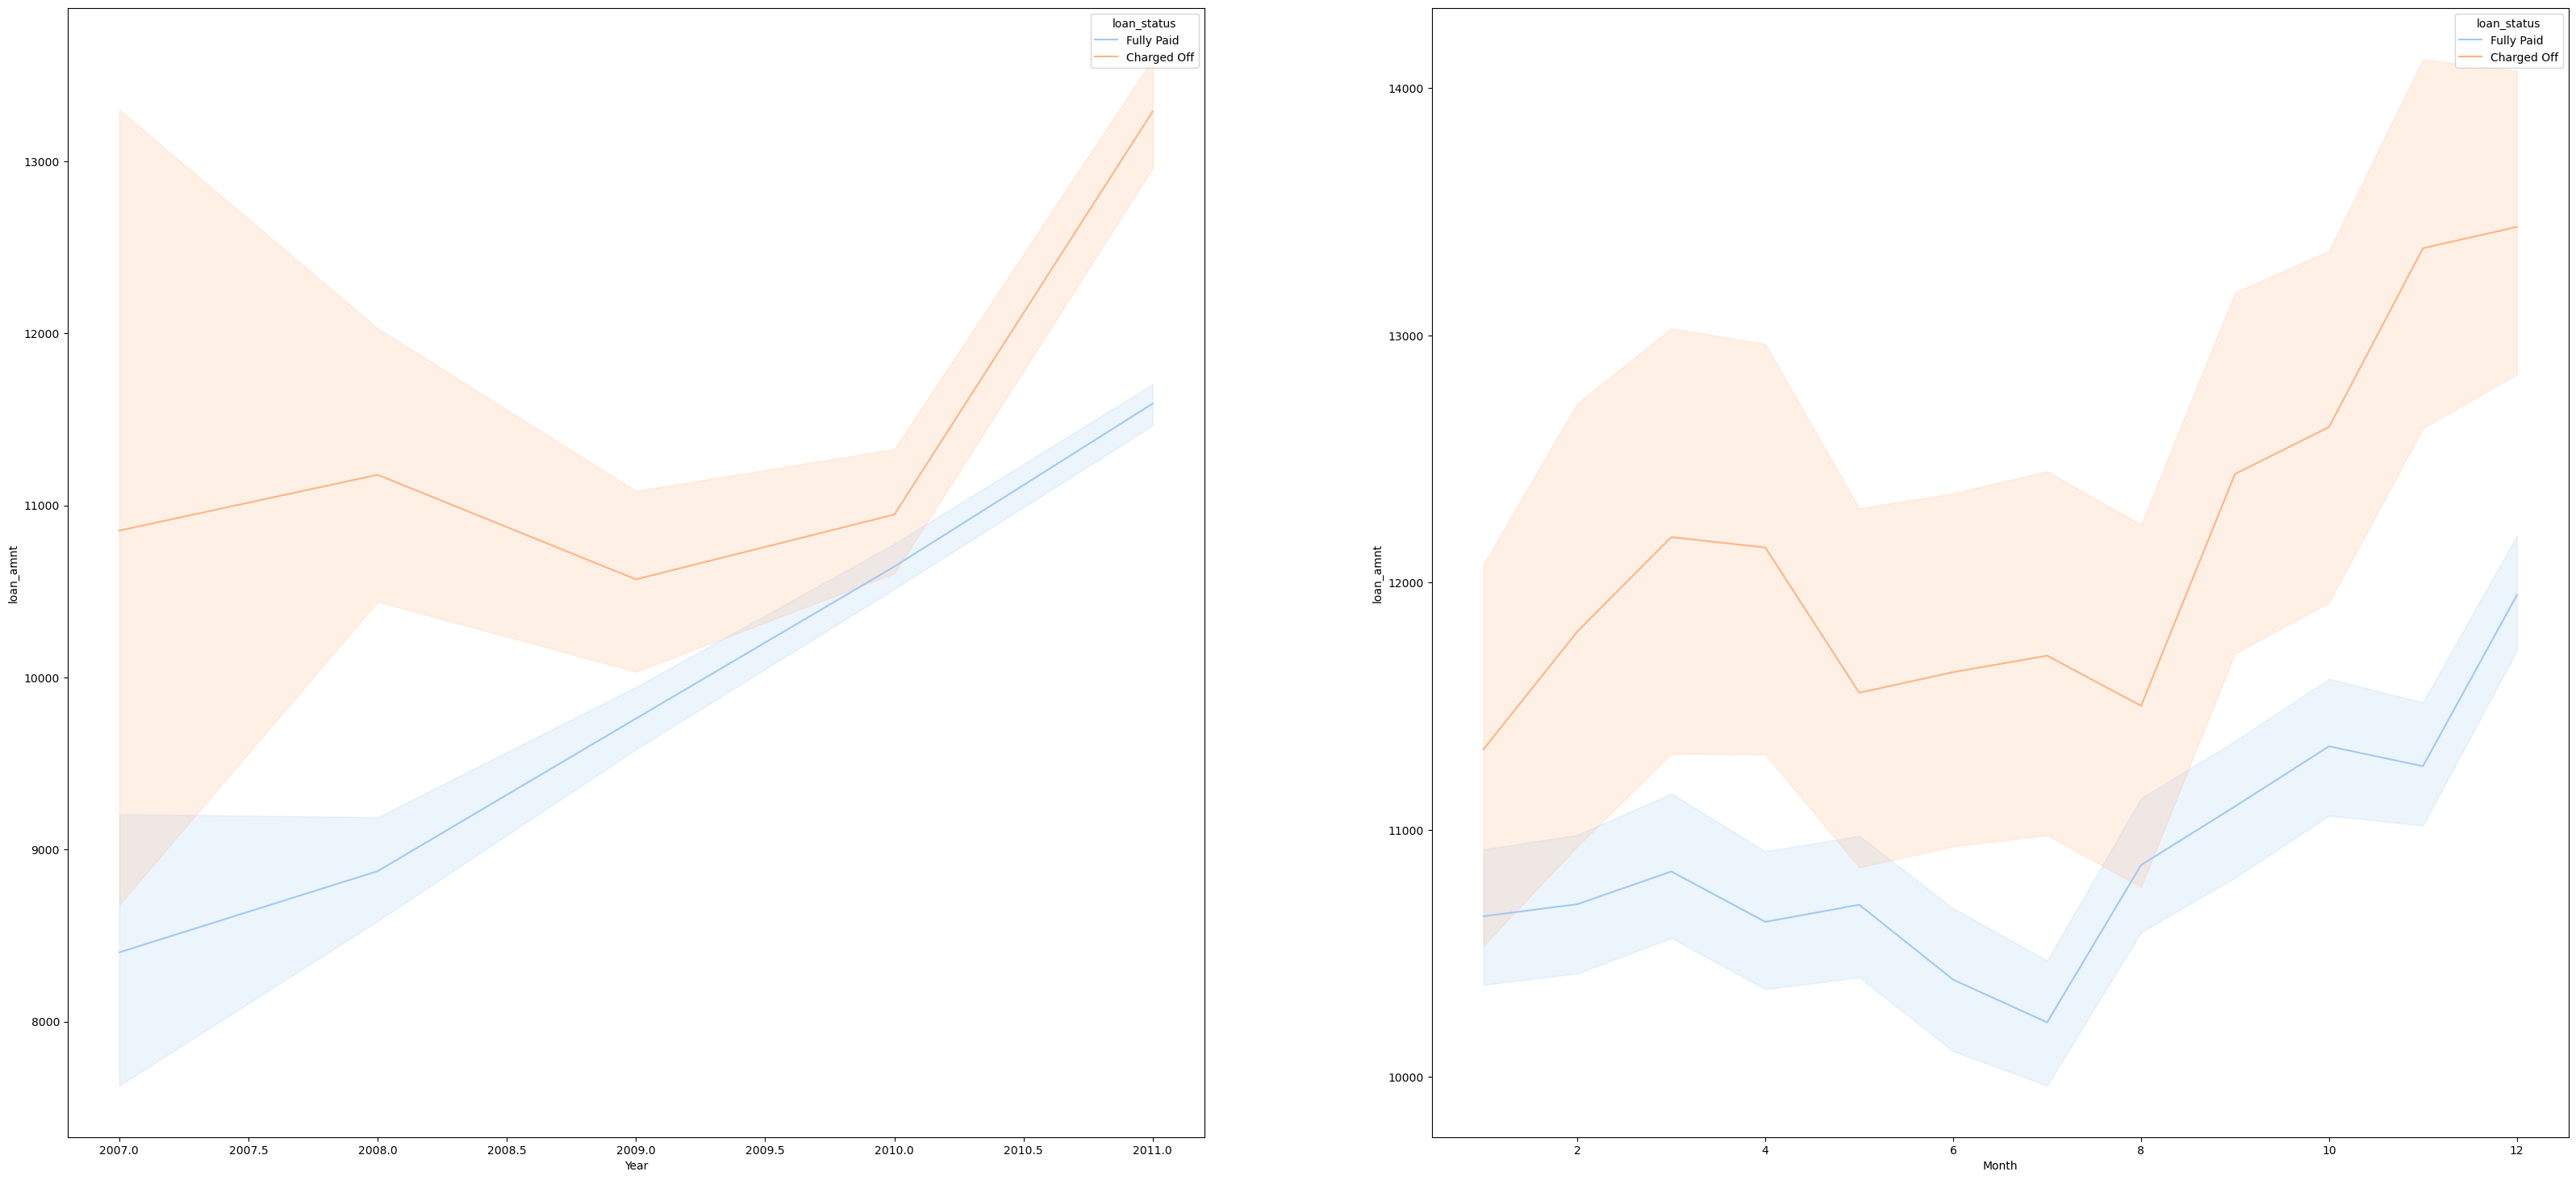

In [155]:
plt.figure(figsize=(40,40))
plt.subplot(221)
sns.lineplot(data =loan_df,y='loan_amnt', x='Year', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_df,y='loan_amnt', x='Month', hue ='loan_status',palette="pastel")

### Bar Graph for comparison of issued loan amount with emp_lenght and verified status

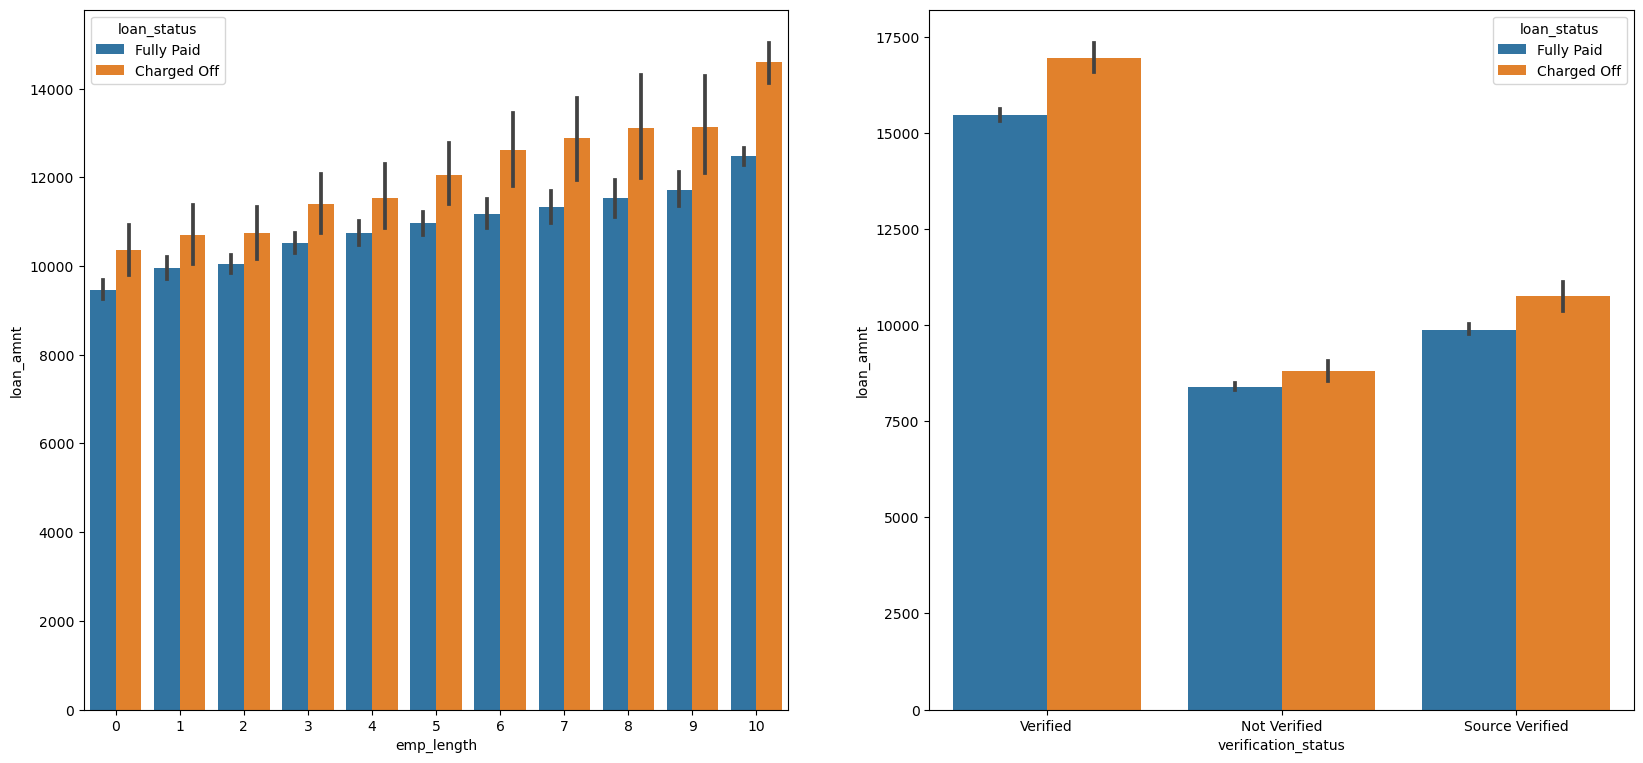

In [156]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status')
plt.show()

### Heat Map for Columns available in dataframe

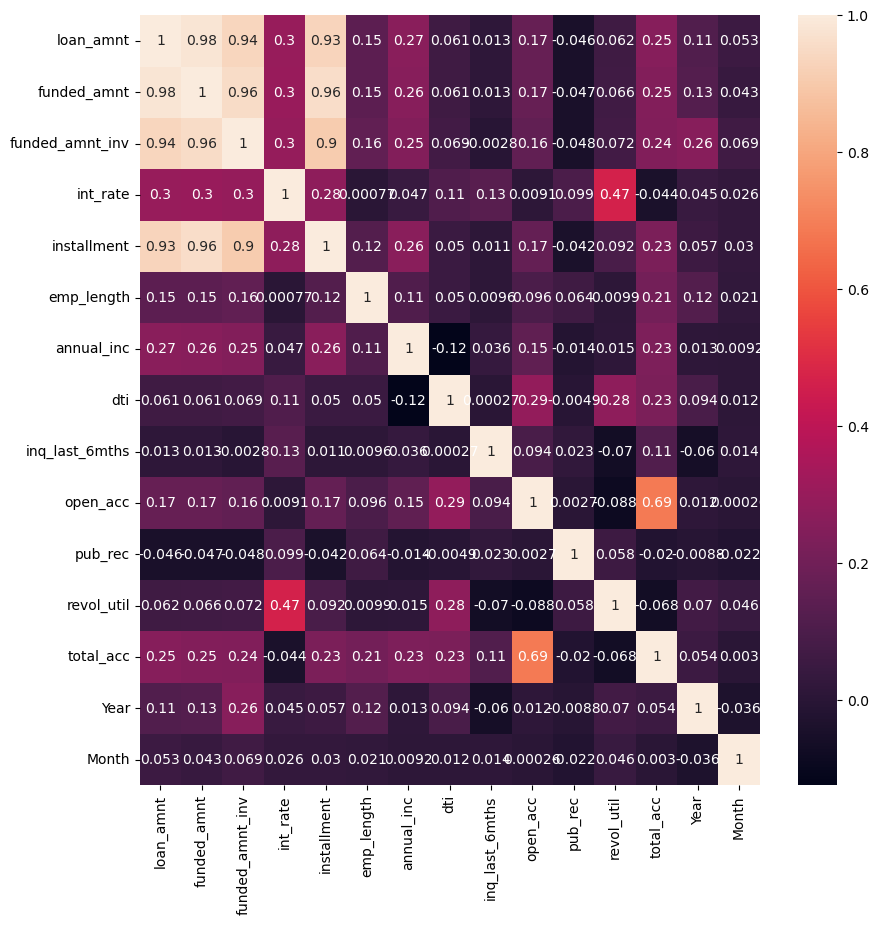

In [157]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

### DISTRIBUTION OF LOAN AND ISSUED YEAR

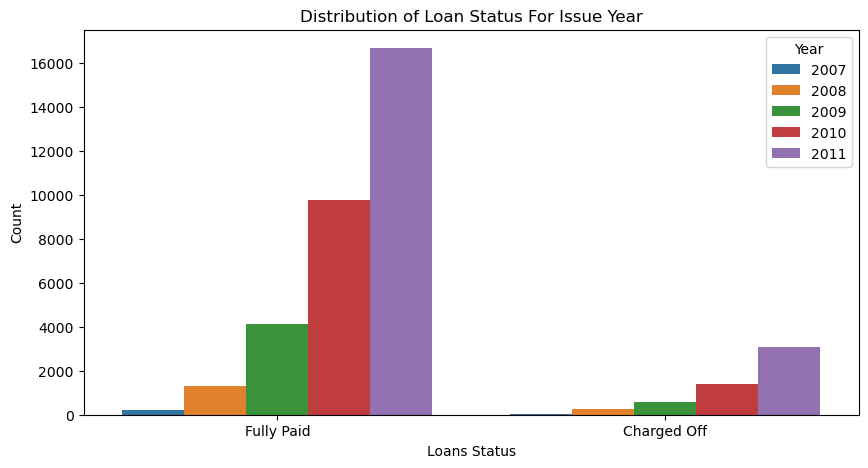

In [158]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='loan_status',hue='Year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()